In [2]:
import pandas as pd
import collections
import numpy

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
###################pull new results from national lottery website and store locally##################################
import urllib.request
url = 'https://www.national-lottery.co.uk/results/set-for-life/draw-history/csv'
filename = 'setForLife_new.csv'
urllib.request.urlretrieve(url, filename)

('setForLife_new.csv', <http.client.HTTPMessage at 0x7d5d5455de50>)

In [5]:
new_df = pd.read_csv('./setForLife_new.csv')

In [6]:
new_df

,DrawDate,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball,Ball Set,Machine,DrawNumber
0,29-Sep-2025,7,12,31,34,35,7,SFL4,Excalibur 2,683
1,25-Sep-2025,10,25,42,43,46,4,SFL6,Excalibur 2,682
2,22-Sep-2025,3,9,34,37,42,3,SFL6,Excalibur 2,681
3,18-Sep-2025,18,19,22,34,40,5,SFL5,Excalibur 1,680
4,15-Sep-2025,18,38,42,45,46,2,SFL5,Excalibur 1,679
5,11-Sep-2025,2,30,39,41,45,9,SFL4,Excalibur 1,678
6,08-Sep-2025,17,18,23,33,44,6,SFL4,Excalibur 1,677
7,04-Sep-2025,6,14,22,28,36,3,SFL6,Excalibur 3,676
8,01-Sep-2025,18,21,24,29,47,7,SFL6,Excalibur 3,675
9,28-Aug-2025,6,18,21,25,34,10,SFL5,Excalibur 3,674


In [7]:
main_df = pd.read_csv('./setForLife.csv')

In [8]:
#main_df['DrawDate'] = main_df['DrawDate'].astype("string")
main_df["DrawDate"] = pd.to_datetime(main_df["DrawDate"])
new_df["DrawDate"] = pd.to_datetime(new_df["DrawDate"])
#new_df.dtypes

In [9]:
main_df.set_index('DrawDate',inplace=True)
new_df.set_index('DrawDate',inplace=True)

In [10]:
#Update the main csv with the new draw results
output_df = pd.concat([main_df, new_df], axis=0, join = 'outer')
output_df.index.name='DrawDate'
output_df.drop_duplicates(keep='first', inplace=True, ignore_index=False)
output_df.sort_index(inplace = True, ascending = False)

In [11]:
len(output_df)

216

In [12]:
output_df.tail(10)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball,Ball Set,Machine,DrawNumber
DrawDate,,,,,,,,,
2023-10-09,6,40,29,44,11,5,SFL7,Excalibur 3,477
2023-10-05,18,39,5,45,6,3,SFL9,Excalibur 3,476
2023-10-02,14,26,7,15,1,2,SFL9,Excalibur 3,475
2023-09-28,37,23,18,29,28,3,SFL8,Excalibur 2,474
2023-09-25,15,12,6,13,41,9,SFL8,Excalibur 2,473
2023-09-21,40,7,24,17,23,1,SFL7,Excalibur 2,472
2023-09-18,43,3,1,28,11,9,SFL7,Excalibur 2,471
2023-09-14,33,34,8,27,44,5,SFL6,Excalibur 3,470
2023-09-11,35,14,24,4,5,3,SFL5,Excalibur 3,469


In [13]:
output_df.head(60)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life Ball,Ball Set,Machine,DrawNumber
DrawDate,,,,,,,,,
2025-09-29,7,12,31,34,35,7,SFL4,Excalibur 2,683
2025-09-25,10,25,42,43,46,4,SFL6,Excalibur 2,682
2025-09-22,3,9,34,37,42,3,SFL6,Excalibur 2,681
2025-09-18,18,19,22,34,40,5,SFL5,Excalibur 1,680
2025-09-15,18,38,42,45,46,2,SFL5,Excalibur 1,679
2025-09-11,2,30,39,41,45,9,SFL4,Excalibur 1,678
2025-09-08,17,18,23,33,44,6,SFL4,Excalibur 1,677
2025-09-04,6,14,22,28,36,3,SFL6,Excalibur 3,676
2025-09-01,18,21,24,29,47,7,SFL6,Excalibur 3,675


In [14]:
output_df.to_csv('./setForLife.csv', index=True)

In [ ]:
# newOutput_df = output_df.copy()
# newOutput_df = newOutput_df.drop(columns = ["Ball Set", "Machine", "DrawNumber"])
# newOutput_df.to_csv('./setForLifeBallsOnly.csv')

In [16]:
main_df = main_df.drop(columns = ["Ball Set", "Machine", "DrawNumber"])
new_df = new_df.drop(columns = ["Ball Set", "Machine", "DrawNumber"])

In [17]:
original_df = pd.concat([main_df, new_df], axis=0, join = 'outer')

In [18]:
original_df.index.name='DrawDate'
original_df.drop_duplicates(keep='first', inplace=True, ignore_index=False)
original_df.sort_index(inplace = True, ascending = False)

In [19]:
# #check and see what type the numbers are in the original_df dataframe, and if necessary, create a new dataframe of python ints



# for key, value in viewDictStarLastTen.items():
#     print(type(value))
#     for num in value:
#         print(type(num))
#         pyval = num.item()
#         print(type(pyval))         

In [20]:
#Creates a list of lists of the numbers in sorted order, and also a long list of all the numbers for the counter

def createLongList(df, set):
  if set == "main":
    jRangeLow = 0
    jRangeHigh = 5
  else:
    jRangeLow = 5
    jRangeHigh = 6
  #numbers is an array of arrays, each week a new array
  numbers = []
  #longlist has all the numbers in a row, to make the chart
  longList = []
  #i and j give the coordinates of the dataframe, going from the second from the left, hence j 1,6
  for i in range(len(df)):
    #print(i)
    tempList = []
    for j in range(jRangeLow, jRangeHigh):
      #print(i)
      #print(j)
      num = df.iloc[i][j]
      tempList.append(num)
      longList.append(num)
    tempList.sort()
    #templist is now an array of that weeks numbers, sorted
    numbers.append(tempList)
  return numbers, longList

In [21]:
###########creation of numbers, numbersLife##########################
numbers, longList = createLongList(original_df, "main")
numbersLife, longListLife = createLongList(original_df, "life")

/tmp/ipykernel_38288/3037728860.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num = df.iloc[i][j]


In [22]:
counterNumbers = collections.Counter(longList)
counterLifes = collections.Counter(longListLife)

In [23]:
def findMax(myDict):
  #find max value in dict
  numMax = 0
  for key in myDict:
    if myDict[key] > numMax:
      numMax = myDict[key]
  return numMax


#iterate through sortedNumMax list and if counterBalls[sortedNumMax] matches
#counterBalls[key], add it to the array. Then when finished, add array to array of arrays

def viewFrequency(myDict):
  occArr = []
  numMax = findMax(myDict)
  for x in range(1, (numMax+1)):
    #print(f"oSet: {x}")
    tempArr = []
    for key in myDict:
      if myDict[key] == x:
        tempArr.append(key)
        #print(key)
    if not tempArr:
      #if tempArr is empty, add a 0 as filler, or it ends up leaving it out
      tempArr.append(0)
    tempArr.sort()
    #add array to array of arrays
    occArr.append(tempArr)
  return occArr, numMax

In [24]:
occArr, numMax = viewFrequency(counterNumbers)
occArrStar, numMaxStar = viewFrequency(counterLifes)

In [25]:
##finally, create the viewer by adding each array to it's corresponding occurence
def createViewer(arrOcc, nMax):
  viewDictAll = {}
  for x in range(1, (nMax + 1)):
    viewDictAll[x] = arrOcc[x-1]
  return viewDictAll

In [26]:
########################viewing dictionaries of occurence###################
viewDictAll = createViewer(occArr, numMax)
starsDictAll = createViewer(occArrStar, numMaxStar)

In [27]:
#####################viewing dictionaries for last 10 weeks##########################

In [28]:
def viewLastTen(ballSet):
  lastTen = []
  if ballSet == "Main":
    lastTen = numbers[:10]
  else:
    lastTen = numbersLife[:10]

  #turn lastTen into a counter...
  counterList = []
  for row in lastTen:
    for num in row:
      counterList.append(num)

  counter = collections.Counter(counterList)

  occArr, numMax = viewFrequency(counter)
  viewer = createViewer(occArr, numMax)
  return viewer
  #return "ook"


In [29]:
viewDictLastTen = viewLastTen("Main")
viewDictStarLastTen = viewLastTen("Star")

In [30]:
print(viewDictStarLastTen)

{1: [2, 4, 5, 6, 9, 10], 2: [3, 7]}


In [31]:
for key, value in viewDictStarLastTen.items():
    print(type(value))
    for num in value:
        print(type(num))
        pyval = num.item()
        print(type(pyval))         

<class 'list'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>
<class 'list'>
<class 'numpy.int64'>
<class 'int'>
<class 'numpy.int64'>
<class 'int'>


In [32]:
viewDictLastTen[1]

[2,
 3,
 7,
 9,
 10,
 12,
 14,
 17,
 19,
 23,
 24,
 28,
 29,
 30,
 31,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 44,
 47]

In [33]:
##################how many this weeks balls are in previous weeks############################

#This returns how many of the balls in that week were in the last x many weeks
def compareTenBackend(numberList, startIndex, weeks):
  num = 0
  endIndex = startIndex + weeks
  tenthList = numberList[startIndex+1:endIndex]
  compareList = numberList[startIndex]

  isin = set([])
  for x in compareList:
    for y in range(0, len(tenthList)):
      if x in tenthList[y]: #this iterates through each array in tenthList
        isin.add(x)

  count = len(isin)
  return count

#write another function that calls compareTenBackend() in a loop, telling us for each week, how many of those balls are in
#the past 10 weeks balls
def compareNextTen(numberList, weeks):
  returnList = []
  for x in range(0,len(numberList)):
    num = compareTenBackend(numberList, x, weeks)
    returnList.append(num)
  return returnList


In [34]:
comparedTen = compareNextTen(numbers, 10)
comparedTenStars = compareNextTen(numbersLife, 10)

#this isn't meaningful
comparedFive = compareNextTen(numbers, 5)
comparedFiveStars = compareNextTen(numbersLife, 5)

#this is only meaningful for the stars
comparedSeven = compareNextTen(numbers, 7)
comparedSevenStars = compareNextTen(numbersLife, 7)

In [35]:
######################## Odd / Even ##############################

In [36]:
def oddEven(numbers):
  even = []
  odd = []
  # x is an array
  for x in numbers:
    evenTotal = 0
    oddTotal = 0
    # y is the number itself
    for y in x:
      if y % 2 == 0:
        evenTotal += 1
      else:
        oddTotal+=1
    even.append(evenTotal)
    odd.append(oddTotal)

  return even, odd

In [37]:
evenList, oddList = oddEven(numbers)

In [38]:
evenTenCounter = collections.Counter(evenList[:10])
evenCounter = collections.Counter(evenList)

oddCounter = collections.Counter(oddList)

In [39]:
#print even if life ball even, else odd. create list
def oddEvenLife(lifeList):
  returned = []
  for x in lifeList:
    if x % 2 == 0:
      returned.append("Even")
    else:
      returned.append("Odd")
  return returned

In [40]:
lifeOddEven = oddEvenLife(longListLife)

In [41]:
def lifeEvenCount(life):
  odd = 0
  even = 0
  for x in life:
    if x == "Odd":
      odd += 1
    else:
      even += 1
  print(f"there are {even} even life balls and {odd} odd life balls")
  return odd, even

In [42]:
lifeOdd, lifeEven = lifeEvenCount(lifeOddEven)

there are 101 even life balls and 115 odd life balls


In [43]:
lifeOddEvenDict = {"Even": lifeEven, "Odd": lifeOdd}
lifeOddEvenDict

{'Even': 101, 'Odd': 115}

In [44]:
def makeMainDfLists(numbers):
  b1 = []
  b2 = []
  b3 = []
  b4 = []
  b5 = []
  for row in numbers:
    b1.append(row[0])
    b2.append(row[1])
    b3.append(row[2])
    b4.append(row[3])
    b5.append(row[4])
  return b1, b2, b3, b4, b5


In [45]:
b1, b2, b3, b4, b5 = makeMainDfLists(numbers)

In [46]:
##########################Create a new dataframe, add columns and rename stuff####################

main_df = original_df.copy()
main_df['Ball 1'] = b1
main_df['Ball 2'] = b2
main_df['Ball 3'] = b3
main_df['Ball 4'] = b4
main_df['Ball 5'] = b5

In [47]:
#list(main_df.columns.values) #list column names
#main_df['DrawDate'] = main_df.index # create column from index

main_df = main_df.rename(columns={"Life Ball": "Life"})
main_df.head(3)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life
DrawDate,,,,,,
2025-09-29,7,12,31,34,35,7
2025-09-25,10,25,42,43,46,4
2025-09-22,3,9,34,37,42,3


In [48]:
main_df['10Main'] = comparedTen
main_df['10Life'] = comparedTenStars
main_df['7Life'] = comparedSevenStars

In [49]:
main_df['Odd'] = oddList
main_df['Even'] = evenList
main_df['LifeOdd'] = lifeOddEven

In [ ]:
#main_df.to_csv('./SetForLife_main_out.csv', index=True)

In [51]:
############### is present ###########################################

In [52]:
# was that bucket in this weeks numbers?
def isPresent(numbers, numb):
  presentList = []
  for row in numbers:
    present = False
    for y in row:
      if y > (numb-1) and y < (numb+9):
        present = True
    if present == True:
      presentList.append("True")
    else:
      presentList.append("False")
  return presentList

In [53]:
presentList0 = isPresent(numbers, 0)
presentList10 = isPresent(numbers, 10)
presentList20 = isPresent(numbers, 20)
presentList30 = isPresent(numbers, 30)
presentList40 = isPresent(numbers, 40)
presentList30[:5]

['True', 'False', 'True', 'True', 'True']

In [54]:
def createDf(zero,one,two,three,four):
    df = original_df.copy()
    df = df.drop(columns = ['Ball 1',
  'Ball 2',
  'Ball 3',
  'Ball 4',
  'Ball 5',
  'Life Ball'])

    df['zeros'] = zero
    df['ones'] = one
    df['twos'] = two
    df['threes'] = three
    df['fours'] = four

    return df

In [55]:
def howManyPresent(numbers):
  zeroList = []
  tenList = []
  twentyList = []
  thirtyList = []
  fourtyList = []
  for row in numbers:
    zero = 0
    ten = 0
    twenty = 0
    thirty = 0
    fourty = 0

    for num in row:
      if num < 10:
        zero += 1
      if num > 9 and num < 20:
        ten += 1
      if num > 19 and num < 30:
        twenty += 1
      if num > 29 and num < 40:
        thirty += 1
      if num > 39 and num < 50:
        fourty += 1
    zeroList.append(zero)
    tenList.append(ten)
    twentyList.append(twenty)
    thirtyList.append(thirty)
    fourtyList.append(fourty)

  df = createDf(zeroList,tenList,twentyList,thirtyList,fourtyList)

  return df,zeroList,tenList,twentyList,thirtyList,fourtyList

In [56]:
present_df, zeros, tens, twenties, thirties, fourties = howManyPresent(numbers)
#present_df.head(5)

In [57]:
presentList = [zeros, tens, twenties, thirties, fourties]

In [58]:
#present_df.to_csv('./setForLife_present_out.csv', index=True)

In [59]:
list(original_df.columns.values)

['Ball 1', 'Ball 2', 'Ball 3', 'Ball 4', 'Ball 5', 'Life Ball']

In [60]:
all_df = main_df.join(present_df)
#all_df.head(5)

In [61]:
all_df

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life,10Main,10Life,7Life,Odd,Even,LifeOdd,zeros,ones,twos,threes,fours
DrawDate,,,,,,,,,,,,,,,,,
2025-09-29,7,12,31,34,35,7,1,1,0,3,2,Odd,1,1,0,3,0
2025-09-25,10,25,42,43,46,4,3,0,0,2,3,Even,0,1,1,0,3
2025-09-22,3,9,34,37,42,3,3,1,1,3,2,Odd,2,0,0,2,1
2025-09-18,18,19,22,34,40,5,3,1,0,1,4,Odd,0,2,1,1,1
2025-09-15,18,38,42,45,46,2,4,0,0,1,4,Even,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21,7,17,23,24,40,1,1,0,0,3,2,Odd,1,1,2,0,1
2023-09-18,1,3,11,28,43,9,1,0,0,4,1,Odd,2,1,1,0,1
2023-09-14,8,27,33,34,44,5,0,0,0,2,3,Odd,1,0,1,2,1


In [62]:
##################### how many in a row from each bucket ###############################

In [63]:
all_df.iloc[0][12]

/tmp/ipykernel_38288/639303502.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df.iloc[0][12]


1

In [64]:
def howManyBucket(presentList):
  runningCount = 0
  returned = []
  count = 0

  #see how many in a row, max.
  for listy in presentList:
    for num in listy:
      if num == 0:
        if count > runningCount:
          runningCount = count
        count = 0
      else: count += 1
    returned.append(runningCount)
    runningCount = 0

  return  returned

In [65]:
bucketInARow = howManyBucket(presentList)
bucketInARow

[9, 21, 12, 12, 12]

In [66]:
def howManyZeros(zeros, tens, twenties, thirties, fourties):
  godList = [zeros, tens, twenties, thirties, fourties]
  count = 0
  runningCount = 0
  returned = []

  for listy in godList:
    for num in listy:
      if num == 0:
        count += 1
      else:
        if count > runningCount:
          runningCount = count
        count = 0
    returned.append(runningCount)
    runningCount = 0

  return returned

In [67]:
bucketZeros = howManyZeros(zeros, tens, twenties, thirties, fourties)
bucketZeros

[4, 6, 5, 4, 4]

In [ ]:
#all_df.to_csv('./setForLife_all.csv', index=True)

In [69]:
#######################when was ball last seen###########

In [70]:
#return a dictionary which the key as the ball number and the value as the last time the ball came out, in number of draws ago
def lastSeen(numbers):
  lastSeenDict = {}
  for num in range(1,48):
    #print(num)
    counter = 1
    for row in numbers:
      if num in row:
        lastSeenDict[num]= counter
        break
      else:
        counter += 1
  return lastSeenDict

lastSeenDict = lastSeen(numbers)

In [71]:
sum = 0
for key in lastSeenDict:
  value = lastSeenDict[key]
  sum = sum + value

averageLastSeen = sum / len(lastSeenDict)
averageLastSeen

8.957446808510639

In [72]:
numbersLife

[[7],
 [4],
 [3],
 [5],
 [2],
 [9],
 [6],
 [3],
 [7],
 [10],
 [9],
 [5],
 [1],
 [8],
 [5],
 [6],
 [2],
 [10],
 [2],
 [5],
 [2],
 [6],
 [9],
 [8],
 [4],
 [4],
 [9],
 [6],
 [5],
 [9],
 [5],
 [9],
 [1],
 [2],
 [4],
 [5],
 [4],
 [3],
 [9],
 [6],
 [5],
 [6],
 [5],
 [4],
 [1],
 [7],
 [8],
 [7],
 [1],
 [5],
 [10],
 [9],
 [1],
 [5],
 [8],
 [4],
 [5],
 [3],
 [10],
 [2],
 [4],
 [3],
 [6],
 [1],
 [3],
 [4],
 [6],
 [1],
 [4],
 [7],
 [8],
 [6],
 [9],
 [10],
 [9],
 [3],
 [9],
 [9],
 [10],
 [6],
 [3],
 [5],
 [7],
 [5],
 [10],
 [8],
 [6],
 [9],
 [1],
 [1],
 [9],
 [5],
 [8],
 [1],
 [5],
 [7],
 [5],
 [6],
 [9],
 [3],
 [5],
 [8],
 [7],
 [10],
 [1],
 [4],
 [6],
 [5],
 [10],
 [3],
 [6],
 [8],
 [10],
 [9],
 [9],
 [4],
 [6],
 [8],
 [9],
 [8],
 [9],
 [2],
 [2],
 [3],
 [1],
 [8],
 [3],
 [6],
 [10],
 [8],
 [9],
 [5],
 [10],
 [5],
 [6],
 [3],
 [10],
 [6],
 [8],
 [7],
 [3],
 [9],
 [8],
 [3],
 [10],
 [9],
 [10],
 [4],
 [9],
 [2],
 [6],
 [5],
 [10],
 [8],
 [1],
 [3],
 [2],
 [4],
 [2],
 [7],
 [6],
 [6],
 [9],
 [9],


In [73]:
#return a dictionary which the key as the life ball number and the value as the last time the ball came out, in number of draws ago

def lastSeenLife(numbers):
  lastSeenDict = {}
  for num in range(1,11):
    #print(num)
    counter = 1
    for row in numbers:
      if num in row:
        lastSeenDict[num]= counter
        break
      else:
        counter += 1
  return lastSeenDict

lastSeenLifeDict = lastSeenLife(numbersLife)

In [74]:
sum = 0
for key in lastSeenLifeDict:
  value = lastSeenLifeDict[key]
  sum = sum + value

averageLastLifeSeen = sum / len(lastSeenLifeDict)
averageLastLifeSeen

6.5

In [75]:
lastSeenLifeDict

{1: 13, 2: 5, 3: 3, 4: 2, 5: 4, 6: 7, 7: 1, 8: 14, 9: 6, 10: 10}

In [76]:
################# calculate probability of bucket distribution #########################

In [77]:
def bucketPercentage(dicty):
  sum = 0
  for key in dicty:
    sum = sum + dicty[key]
  for key in dicty:
    value = dicty[key] / sum * 100
    value = float(round(value, 2))
    dicty[key] = value
  return dicty

def bucketProbability(df):
  count11111 = 0
  count01112 = 0
  count00122 = 0
  count00113 = 0
  count00023 = 0
  count00014 = 0
  count00005 = 0

  returnDict = {"11111": 0, "01112": 0, "00122": 0, "00113": 0, "00023": 0, "00014": 0, "00005": 0}
  for row in range(len(df)):
    tempList = []
    for bucket in range(12,17):
      value = df.iloc[row][bucket]
      #stick value in a wee list, sort it
      tempList.append(value)
      tempList.sort()
    #print(tempList)

    if tempList == [1,1,1,1,1]:
      count11111 += 1
    elif tempList == [0,1,1,1,2]:
      count01112 += 1
    elif tempList == [0,0,1,2,2]:
      count00122 += 1
    elif tempList == [0,0,1,1,3]:
      count00113 += 1
    elif tempList == [0,0,0,2,3]:
      count00023 += 1
    elif tempList == [0,0,0,1,4]:
      count00014 += 1
    elif tempList == [0,0,0,0,5]:
      count00005 += 1
    else:
      print("you've missed something!")
      return "oops"
  returnDict["11111"] = count11111
  returnDict["01112"] = count01112
  returnDict["00122"] = count00122
  returnDict["00113"] = count00113
  returnDict["00023"] = count00023
  returnDict["00014"] = count00014
  returnDict["00005"] = count00005

  dicty = bucketPercentage(returnDict)
  return dicty

In [78]:
#all_df.iloc["down"]["across"]
all_df.iloc[0][12]

/tmp/ipykernel_38288/695827443.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  all_df.iloc[0][12]


1

In [79]:
bucketProbs = bucketProbability(all_df)
bucketProbs

/tmp/ipykernel_38288/1021140522.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df.iloc[row][bucket]


{'11111': 4.63,
 '01112': 37.04,
 '00122': 30.56,
 '00113': 21.76,
 '00023': 2.78,
 '00014': 3.24,
 '00005': 0.0}

In [80]:
######## first number even or odd ############################

In [81]:
def firstEven(numbers):
    evenCount = 0
    oddCount = 0
    maxEven = 0
    maxOdd = 0
    maxOddList = []
    maxEvenList = []
    for row in numbers:
        #print(f"oddCount == {oddCount}, evenCount == {evenCount}")
        
        if row[0] % 2 == 0:
            
            #print(f"{row[0]} is even")
            
            if oddCount != 0:
                maxOddList.append(oddCount)
                oddCount = 0 
            evenCount += 1
            
            if maxEven < evenCount:
                maxEven = evenCount
           
        else:
            #print(f"{row[0]} is odd")
            
            if evenCount != 0:
                maxEvenList.append(evenCount)
                evenCount = 0
            oddCount += 1
            
            if maxOdd < oddCount:
                maxOdd = oddCount
                
    print(f"maxEvenList is {maxEvenList}, \nmaxOddList is {maxOddList}")
    return maxEven, maxOdd, maxEvenList, maxOddList


In [82]:
maxEven, maxOdd, maxEvenList, maxOddList = firstEven(numbers)

maxEvenList is [1, 3, 3, 2, 3, 1, 1, 2, 4, 1, 1, 1, 1, 3, 2, 1, 1, 1, 4, 3, 1, 1, 1, 4, 2, 1, 1, 1, 2, 5, 1, 7, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 1, 1, 2, 2], 
maxOddList is [1, 1, 1, 2, 3, 7, 1, 7, 1, 1, 1, 3, 5, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 5, 3, 1, 1, 1, 2, 3, 3, 3, 1, 1, 1, 4, 2, 3, 4, 2, 1, 2, 5, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2]


In [83]:
maxOddList

[1,
 1,
 1,
 2,
 3,
 7,
 1,
 7,
 1,
 1,
 1,
 3,
 5,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 5,
 3,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 4,
 2,
 3,
 4,
 2,
 1,
 2,
 5,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 2]

In [84]:
###########################Charts############################################

In [85]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [86]:
def plot_dictionary_bar(dictionary, x, title):
  keys = dictionary.keys()
  values = dictionary.values()
  plt.bar(keys, values)
  plt.xlabel(x)
  plt.ylabel('Occurrence')
  plt.title(title)

  plt.show()

def plot_dictionary_bar_y(dictionary, x, y, title):
  keys = dictionary.keys()
  values = dictionary.values()
  plt.bar(keys, values)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.title(title)

  plt.show()

In [87]:
counterLastTen = collections.Counter(comparedTen)
counterLastTen

Counter({3: 78, 4: 64, 2: 38, 5: 20, 1: 12, 0: 4})

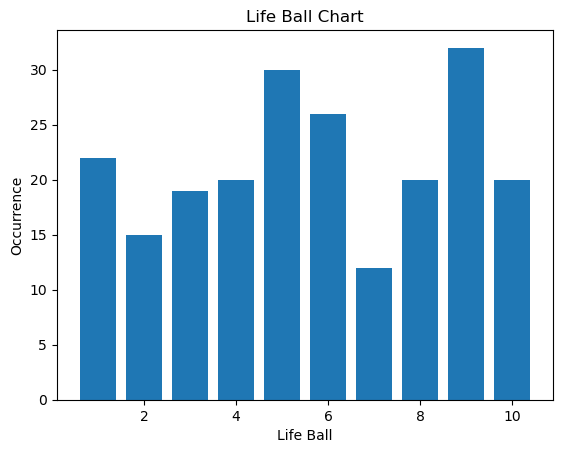

In [88]:
plot_dictionary_bar(counterLifes, "Life Ball", "Life Ball Chart")

In [89]:
all_df.head(60)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life,10Main,10Life,7Life,Odd,Even,LifeOdd,zeros,ones,twos,threes,fours
DrawDate,,,,,,,,,,,,,,,,,
2025-09-29,7,12,31,34,35,7,1,1,0,3,2,Odd,1,1,0,3,0
2025-09-25,10,25,42,43,46,4,3,0,0,2,3,Even,0,1,1,0,3
2025-09-22,3,9,34,37,42,3,3,1,1,3,2,Odd,2,0,0,2,1
2025-09-18,18,19,22,34,40,5,3,1,0,1,4,Odd,0,2,1,1,1
2025-09-15,18,38,42,45,46,2,4,0,0,1,4,Even,0,1,0,1,3
2025-09-11,2,30,39,41,45,9,1,1,1,3,2,Odd,1,0,0,2,2
2025-09-08,17,18,23,33,44,6,4,1,0,3,2,Even,0,2,1,1,1
2025-09-04,6,14,22,28,36,3,3,0,0,0,5,Odd,1,1,2,1,0
2025-09-01,18,21,24,29,47,7,4,0,0,3,2,Odd,0,1,3,0,1


In [90]:
all_df.tail(20)

,Ball 1,Ball 2,Ball 3,Ball 4,Ball 5,Life,10Main,10Life,7Life,Odd,Even,LifeOdd,zeros,ones,twos,threes,fours
DrawDate,,,,,,,,,,,,,,,,,
2023-11-13,3,11,33,38,45,10,3,1,1,4,1,Even,1,1,0,2,1
2023-11-09,9,11,27,36,47,9,3,0,0,4,1,Odd,1,1,1,1,1
2023-11-06,2,5,11,15,27,10,3,1,1,4,1,Even,2,2,1,0,0
2023-11-02,12,20,41,42,46,8,3,0,0,1,4,Even,0,1,1,0,3
2023-10-30,6,12,13,18,19,7,5,0,0,2,3,Odd,1,4,0,0,0
2023-10-26,2,11,23,43,46,10,4,0,0,3,2,Even,1,1,1,0,2
2023-10-23,11,30,34,35,38,1,4,1,0,2,3,Odd,0,1,0,4,0
2023-10-19,12,14,38,41,44,5,4,1,1,1,4,Odd,0,2,0,1,2
2023-10-16,13,30,33,35,43,6,3,0,0,4,1,Even,0,1,0,3,1


In [91]:
numbers[:15]

[[7, 12, 31, 34, 35],
 [10, 25, 42, 43, 46],
 [3, 9, 34, 37, 42],
 [18, 19, 22, 34, 40],
 [18, 38, 42, 45, 46],
 [2, 30, 39, 41, 45],
 [17, 18, 23, 33, 44],
 [6, 14, 22, 28, 36],
 [18, 21, 24, 29, 47],
 [6, 18, 21, 25, 34],
 [5, 32, 34, 38, 44],
 [3, 6, 7, 14, 18],
 [2, 4, 8, 11, 28],
 [8, 9, 21, 32, 42],
 [3, 6, 24, 27, 34]]

In [92]:
viewDictLastTen

{1: [2,
  3,
  7,
  9,
  10,
  12,
  14,
  17,
  19,
  23,
  24,
  28,
  29,
  30,
  31,
  33,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  47],
 2: [6, 21, 22, 25, 45, 46],
 3: [42],
 4: [34],
 5: [18]}

In [93]:
viewDictAll

{1: [0],
 2: [0],
 3: [0],
 4: [0],
 5: [0],
 6: [0],
 7: [0],
 8: [0],
 9: [0],
 10: [0],
 11: [0],
 12: [16],
 13: [0],
 14: [20],
 15: [0],
 16: [1],
 17: [37, 40],
 18: [25, 47],
 19: [2, 13, 45],
 20: [9, 17, 28, 29, 30, 31, 33, 39, 46],
 21: [22, 42],
 22: [8, 24],
 23: [4, 7, 32, 36, 43],
 24: [26, 27, 38, 44],
 25: [5, 10],
 26: [14],
 27: [15, 19],
 28: [12, 23, 41],
 29: [18, 21],
 30: [35],
 31: [6],
 32: [3, 34],
 33: [0],
 34: [0],
 35: [0],
 36: [0],
 37: [11]}

In [94]:
viewDictStarLastTen

{1: [2, 4, 5, 6, 9, 10], 2: [3, 7]}

In [95]:
starsDictAll

{1: [0],
 2: [0],
 3: [0],
 4: [0],
 5: [0],
 6: [0],
 7: [0],
 8: [0],
 9: [0],
 10: [0],
 11: [0],
 12: [7],
 13: [0],
 14: [0],
 15: [2],
 16: [0],
 17: [0],
 18: [0],
 19: [3],
 20: [4, 8, 10],
 21: [0],
 22: [1],
 23: [0],
 24: [0],
 25: [0],
 26: [6],
 27: [0],
 28: [0],
 29: [0],
 30: [5],
 31: [0],
 32: [9]}

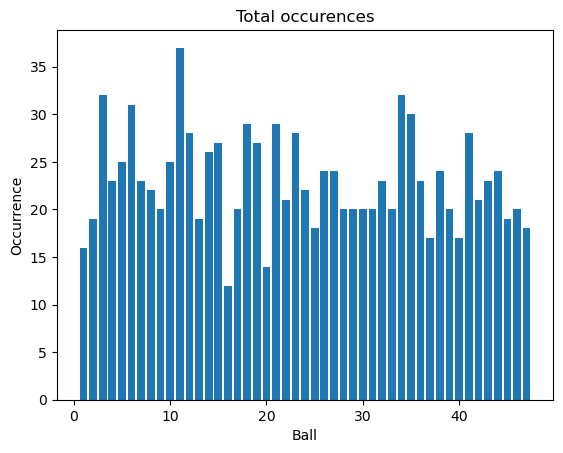

In [96]:
plot_dictionary_bar(counterNumbers, "Ball", "Total occurences")

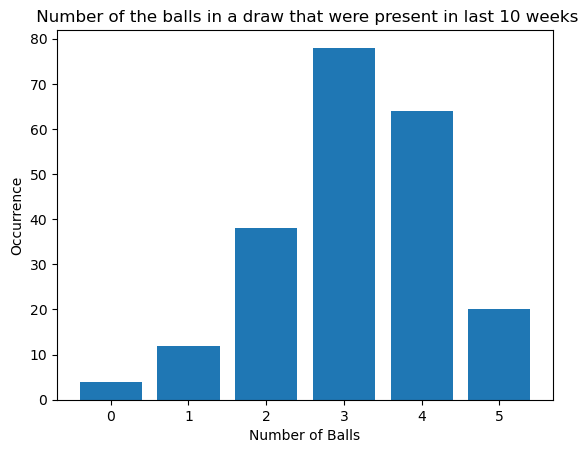

In [97]:
plot_dictionary_bar(counterLastTen, "Number of Balls", " Number of the balls in a draw that were present in last 10 weeks")

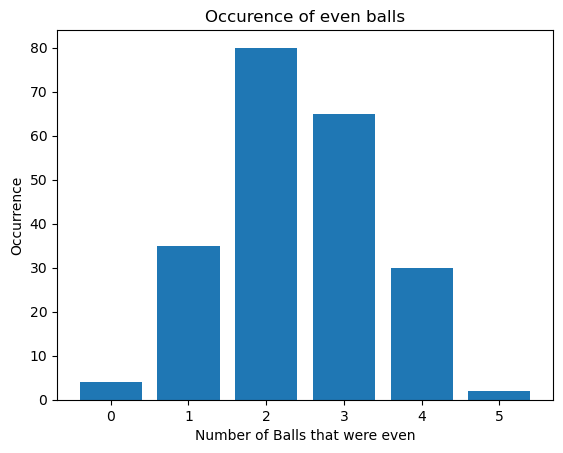

In [98]:
plot_dictionary_bar(evenCounter, "Number of Balls that were even", "Occurence of even balls")

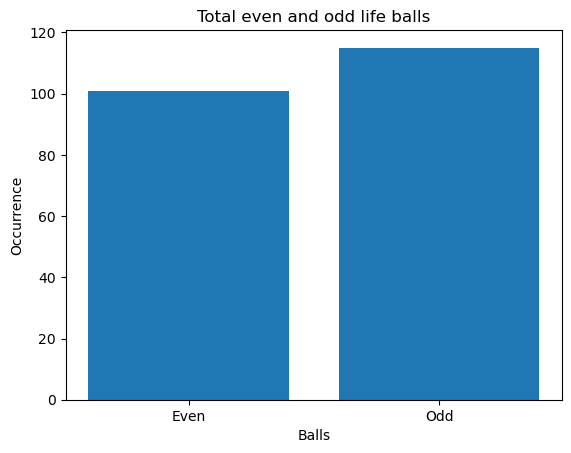

In [99]:
plot_dictionary_bar(lifeOddEvenDict, "Balls", "Total even and odd life balls")


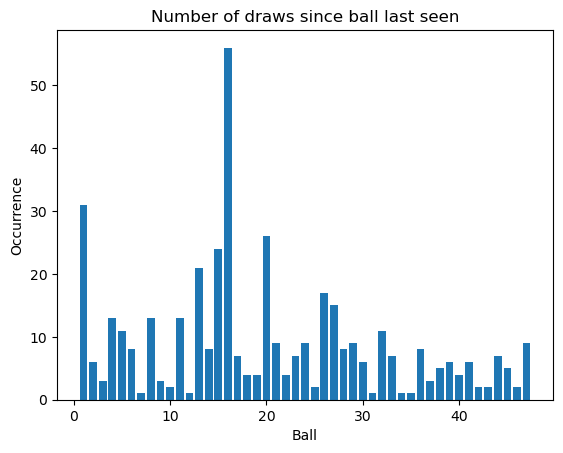

In [100]:
plot_dictionary_bar(lastSeenDict, "Ball", "Number of draws since ball last seen")

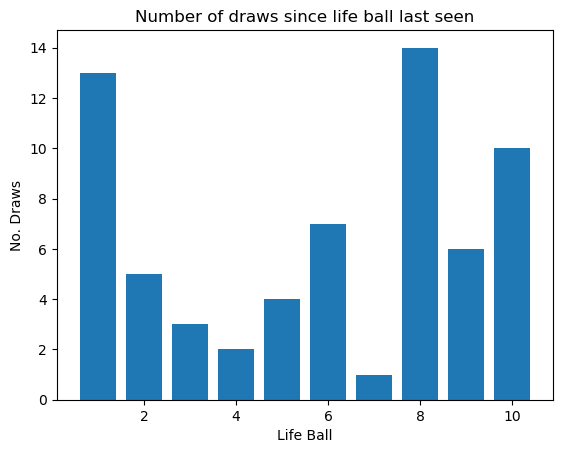

In [101]:
plot_dictionary_bar_y(lastSeenLifeDict, "Life Ball", "No. Draws", "Number of draws since life ball last seen")

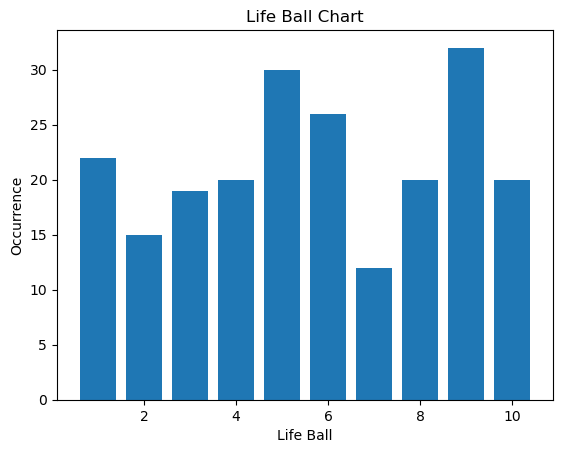

In [102]:
plot_dictionary_bar(counterLifes, "Life Ball", "Life Ball Chart")

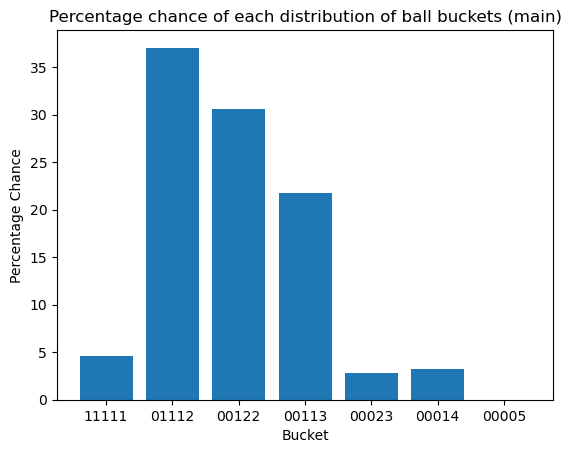

In [103]:
plot_dictionary_bar_y(bucketProbs, "Bucket", "Percentage Chance", "Percentage chance of each distribution of ball buckets (main)")

In [104]:
type(numbers)

list

In [105]:
%store numbers

Stored 'numbers' (list)


/usr/lib/python3/dist-packages/IPython/extensions/storemagic.py:229: UserWarning: using autorestore/numbers requires you to install the `pickleshare` library.
  db[ 'autorestore/' + arg ] = obj
